___

<p style="text-align: center;"><img src="https://docs.google.com/uc?id=1lY0Uj5R04yMY3-ZppPWxqCr5pvBLYPnV" class="img-fluid" alt="CLRSWY"></p>

___

# WELCOME!

In this assignment, you must apply ***EDA*** processes for the development of predictive models. Handling outliers, domain knowledge and feature engineering will be challenges. 

Also, this project aims to improve your ability to implement algorithms for ***Multi-Class Classification***. Thus, you will have the opportunity to implement many algorithms commonly used for Multi-Class Classification problems.

Before diving into the project, please take a look at the determines and tasks.

---
---

# #Determines

Dataset contains tree observations from four areas of one national forest district. This dataset includes information on tree type, shadow coverage, distance to nearby landmarks, soil type, and local topography. The goal of the project is to build a model that predicts what types of trees grow in an area.
***The Forest Dataset*** contains approximately 600 thousand lines, also you can easily find many information about it on the web (especially Kaggle).

---

To achieve high prediction success, you must understand the data well and develop different approaches that can affect the dependent variable.

Firstly, try to understand the dataset column by column using pandas module. Do research within the scope of domain (forest, trees) knowledge on the internet to get to know the data set in the fastest way. 

You should implement cleaning, handling with outliers and missing values using Pandas, NumPy and other required modules for the best result in modeling. You should do Feature Engineering.

After that, your final dataset with the new variables you have created will be ready for model building. You will implement ***Support Vector Machine, XGBoost, Random Forest, Desicion Tree*** algorithms. Also, evaluate the success of your models with appropriate performance metrics.

At the end of the project, create a chart comparing the performance of all models and choose the most successful model.


---
---

# #Tasks

#### 1. Exploratory Data Analysis (EDA)
- Import Libraries, Load Dataset, Exploring Data

    *i. Import Libraries*
    
    *ii. Load Dataset*
    
    *iii. Explore Data*

#### 2.  Data Cleaning
- Detect Missing Values and Outliers 

    *i. Missing Value Detection*
    
    *ii. Outlier Detection*
    
- Deal with Outliers
    
    *i. Drop Outliers*


#### 3. Feature Engineering


#### 4. Prediction (Multi-class Classification)
- Import libraries
- Data Preprocessing
- Implement SVM Classifer
- Implement Decision Tree Classifier
- Implement Random Forest Classifer
- Implement XGBoost Classifer
- Compare The Models



---
---

## 1. Exploratory Data Analysis

### Import Libraries, Load Dataset, Exploring Data

#### *i. Import Libraries*

Besides Numpy and Pandas, you need to import the necessary modules for data visualization, data preprocessing, Model building and tuning.

*Note: Check out the course materials.*

In [40]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
#%matplotlib inline
plt.rcParams['figure.dpi'] = 100
sns.set_style("whitegrid")
import warnings
warnings.filterwarnings("ignore")
warnings.warn("this will not show")
pd.set_option('display.float_format', lambda x: '%.3f' % x)
pd.options.display.max_rows = 100
pd.options.display.max_columns = 100

#### *ii. Load Dataset*

In [41]:
df = pd.read_csv("treetypes.csv")

#### *iii. Explore Data*
- Focus on numerical and categorical data
- Detect Number of Unique values of each column
- Focus on Target Variable (Cover_Type)
 - Detect relationships and correlations between independent variables and target variable.
 - It may be nice to visualize the class frequencies of the target variable.
- Detect relationships and correlations between independent variables. (You can prefer to keep only one of the highly correlated continuous variables.)
- Consider dropping features that contain little data or that you think will not contribute to the model.

In [42]:
df.head()

,Elevation,Aspect,Slope,Horizontal_Distance_To_Hydrology,Vertical_Distance_To_Hydrology,Horizontal_Distance_To_Roadways,Hillshade_9am,Hillshade_Noon,Hillshade_3pm,Horizontal_Distance_To_Fire_Points,Wilderness_Area_1,Wilderness_Area_2,Wilderness_Area_3,Wilderness_Area_4,Soil_Type_1,Soil_Type_2,Soil_Type_3,Soil_Type_4,Soil_Type_5,Soil_Type_6,Soil_Type_7,Soil_Type_8,Soil_Type_9,Soil_Type_10,Soil_Type_11,Soil_Type_12,Soil_Type_13,Soil_Type_14,Soil_Type_15,Soil_Type_16,Soil_Type_17,Soil_Type_18,Soil_Type_19,Soil_Type_20,Soil_Type_21,Soil_Type_22,Soil_Type_23,Soil_Type_24,Soil_Type_25,Soil_Type_26,Soil_Type_27,Soil_Type_28,Soil_Type_29,Soil_Type_30,Soil_Type_31,Soil_Type_32,Soil_Type_33,Soil_Type_34,Soil_Type_35,Soil_Type_36,Soil_Type_37,Soil_Type_38,Soil_Type_39,Soil_Type_40,Cover_Type
0,2696,123,10,212,48,2245,237,231,123,2113,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,6
1,3269,110,19,134,40,3734,249,216,88,3960,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1
2,3283,322,18,346,104,4369,170,217,185,1330,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,7
3,2847,89,31,270,175,1320,248,173,29,889,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,5
4,3248,93,12,507,118,570,239,221,110,945,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,7


In [43]:
df.shape

(250000, 55)

The dataframe contains 250 thousands observationsa and 55 features

__Check for duplicates__

In [44]:
df.duplicated().value_counts()

False    247479
True       2521
dtype: int64

In [45]:
#drop duplicates
df.drop_duplicates(inplace=True)
df.shape

(247479, 55)

In [46]:
df.reset_index(drop=True, inplace=True)
df.tail()

,Elevation,Aspect,Slope,Horizontal_Distance_To_Hydrology,Vertical_Distance_To_Hydrology,Horizontal_Distance_To_Roadways,Hillshade_9am,Hillshade_Noon,Hillshade_3pm,Horizontal_Distance_To_Fire_Points,Wilderness_Area_1,Wilderness_Area_2,Wilderness_Area_3,Wilderness_Area_4,Soil_Type_1,Soil_Type_2,Soil_Type_3,Soil_Type_4,Soil_Type_5,Soil_Type_6,Soil_Type_7,Soil_Type_8,Soil_Type_9,Soil_Type_10,Soil_Type_11,Soil_Type_12,Soil_Type_13,Soil_Type_14,Soil_Type_15,Soil_Type_16,Soil_Type_17,Soil_Type_18,Soil_Type_19,Soil_Type_20,Soil_Type_21,Soil_Type_22,Soil_Type_23,Soil_Type_24,Soil_Type_25,Soil_Type_26,Soil_Type_27,Soil_Type_28,Soil_Type_29,Soil_Type_30,Soil_Type_31,Soil_Type_32,Soil_Type_33,Soil_Type_34,Soil_Type_35,Soil_Type_36,Soil_Type_37,Soil_Type_38,Soil_Type_39,Soil_Type_40,Cover_Type
247474,2112,339,39,49,17,467,107,151,162,435,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,3
247475,2872,90,31,251,147,2027,248,172,27,508,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,5
247476,2336,57,5,0,0,1429,224,228,139,387,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,4
247477,2563,181,10,0,0,1349,223,246,156,1007,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,5
247478,3720,354,17,1112,311,5105,189,208,155,3256,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,7


In [47]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 247479 entries, 0 to 247478
Data columns (total 55 columns):
 #   Column                              Non-Null Count   Dtype
---  ------                              --------------   -----
 0   Elevation                           247479 non-null  int64
 1   Aspect                              247479 non-null  int64
 2   Slope                               247479 non-null  int64
 3   Horizontal_Distance_To_Hydrology    247479 non-null  int64
 4   Vertical_Distance_To_Hydrology      247479 non-null  int64
 5   Horizontal_Distance_To_Roadways     247479 non-null  int64
 6   Hillshade_9am                       247479 non-null  int64
 7   Hillshade_Noon                      247479 non-null  int64
 8   Hillshade_3pm                       247479 non-null  int64
 9   Horizontal_Distance_To_Fire_Points  247479 non-null  int64
 10  Wilderness_Area_1                   247479 non-null  int64
 11  Wilderness_Area_2                   247479 non-null 

There is no ___null values___ and all features are ___integers___.

In [48]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Elevation,247479.000,2751.275,417.898,1859.000,2379.000,2757.000,3111.000,3857.000
Aspect,247479.000,156.339,109.781,0.000,65.000,125.000,261.000,360.000
Slope,247479.000,16.311,8.313,0.000,10.000,15.000,22.000,65.000
Horizontal_Distance_To_Hydrology,247479.000,228.700,209.829,0.000,67.000,180.000,330.000,1390.000
Vertical_Distance_To_Hydrology,247479.000,50.897,61.025,-163.000,5.000,32.000,79.000,598.000
Horizontal_Distance_To_Roadways,247479.000,1725.671,1333.550,0.000,759.000,1322.000,2305.000,7112.000
Hillshade_9am,247479.000,212.272,30.659,0.000,195.000,219.000,235.000,254.000
Hillshade_Noon,247479.000,218.539,22.685,0.000,206.000,222.000,235.000,254.000
Hillshade_3pm,247479.000,134.676,45.955,0.000,106.000,137.000,167.000,252.000
Horizontal_Distance_To_Fire_Points,247479.000,1525.652,1109.577,0.000,736.000,1275.000,2005.000,7150.000


From the description of datas it can be seen that there are continuous and discreet features. But, it needs to be precisely determined. Firstly, let us look at the unique values in each feature.

In [49]:
df.apply(lambda x: x.nunique())

Elevation                             1983
Aspect                                 361
Slope                                   59
Horizontal_Distance_To_Hydrology      1294
Vertical_Distance_To_Hydrology         578
Horizontal_Distance_To_Roadways       6501
Hillshade_9am                          207
Hillshade_Noon                         165
Hillshade_3pm                          253
Horizontal_Distance_To_Fire_Points    6487
Wilderness_Area_1                        2
Wilderness_Area_2                        2
Wilderness_Area_3                        2
Wilderness_Area_4                        2
Soil_Type_1                              2
Soil_Type_2                              2
Soil_Type_3                              2
Soil_Type_4                              2
Soil_Type_5                              2
Soil_Type_6                              2
Soil_Type_7                              2
Soil_Type_8                              2
Soil_Type_9                              2
Soil_Type_1

Now, let us print all unique values and their frequencies

In [50]:
for feature in df.columns:
    print(df[feature].value_counts())

2326    307
2305    293
2952    292
2330    284
2304    282
       ... 
3646      1
3676      1
1866      1
3842      1
1863      1
Name: Elevation, Length: 1983, dtype: int64
45     1435
90     1366
63     1228
117    1159
135    1158
       ... 
245     252
235     243
244     213
359     201
360       8
Name: Aspect, Length: 361, dtype: int64
10    12211
11    12163
13    11800
12    11789
15    11300
14    11202
9     11100
16    10639
8     10331
17     9951
18     9655
7      9211
19     8932
20     8293
6      8066
21     7978
22     7523
23     6842
5      6544
24     6198
25     5979
26     5390
4      5113
27     4924
28     4461
29     3955
30     3536
3      3519
31     3281
32     2675
33     2204
2      2132
34     1846
35     1461
36     1138
37      897
1       857
38      626
39      447
40      324
41      240
42      147
0       141
43      131
45       81
44       74
46       40
49       36
48       31
47       30
50       17
53        4
52        4
51        3
56  

__Continuous Fatures:__ "Elevation", "Aspect", "Slope", "Horizontal_Distance_To_Hydrology", "Vertical_Distance_To_Hydrology", "Horizontal_Distance_To_Roadways", "Hillshade_9am", "Hillshade_Noon", "Hillshade_3pm" and "Horizontal_Distance_To_Fire_Points"

__Binary Features:__ Wilderness_Areas and Soil_Types are categorical (binary 1 or 0) data.

__Target Variable:__ It is Cover_Type and it takes discreet values. Let us check the frequencies of target values.

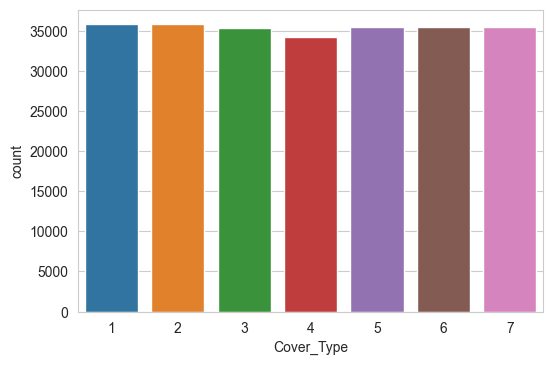

In [51]:
sns.countplot(df.Cover_Type);

__Warning:__ XGBoost version does not accept target variable starting from 1 to 7. Target variable should start from 0. So, decrease all target variables by 1.

In [52]:
#xgboost does not accept target values of 1-7
#target values should be 0-6. This is because of version difference
#Decrease each target variable by one
df.Cover_Type=df.Cover_Type-1

In [53]:
df.Cover_Type.value_counts()

0    35835
1    35780
4    35514
6    35481
5    35430
2    35273
3    34166
Name: Cover_Type, dtype: int64

From frequency graph, it can be seen that target feature might take discreet values from 1 to 7 and all possible values has almost equally appeared. Indeed, class label 4 has the lowest value of 34166 and clas label 1 has the highest value of 35835. Anyway, the output values could be considered as balanced.

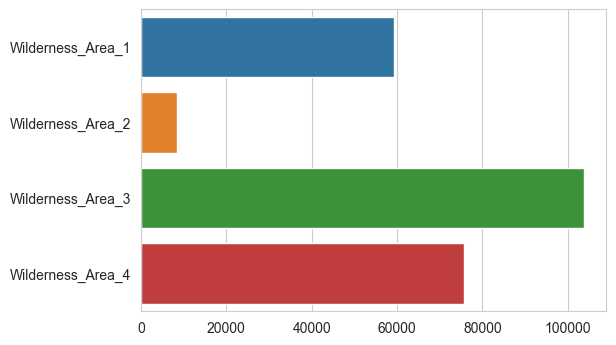

In [32]:
sns.barplot(y=['Wilderness_Area_1', 'Wilderness_Area_2', 'Wilderness_Area_3', 'Wilderness_Area_4'], x=df[['Wilderness_Area_1', 'Wilderness_Area_2', 'Wilderness_Area_3', 'Wilderness_Area_4']].sum());


In [20]:
temp=df[df.columns[0:3]].join(df['Cover_Type'])

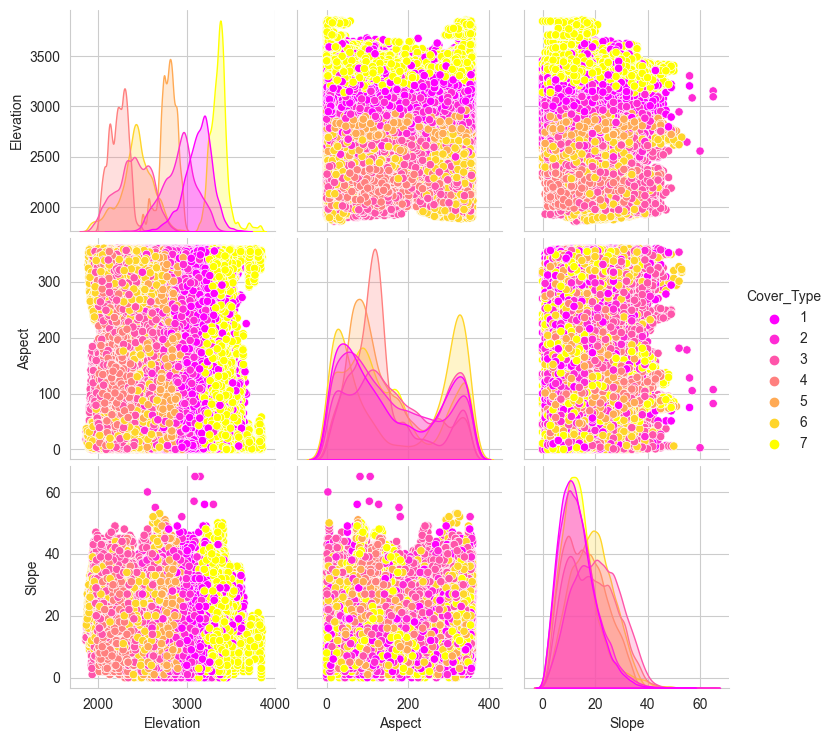

In [21]:
sns.pairplot(temp,hue='Cover_Type',palette='spring')

In [ ]:
temp=df[df.columns[3:6]].join(df['Cover_Type'])

In [ ]:
sns.pairplot(temp,hue='Cover_Type',palette='spring')

__Correlation of continuous features__:

## 2.  Data Cleaning

### Detect Missing Values and Outliers

#### *i. Missing Value Detection*

In [54]:
#there is no missing values
df.isnull().sum().any()

False

#### *ii. Outlier Detection*

The columns which have continuous value should be examined in terms of [outliers](https://datascience.foundation/sciencewhitepaper/knowing-all-about-outliers-in-machine-learning) (Watch out for columns that look like continuous but not continuous!). Some algorithms are [sensitive to outliers](https://arsrinevetha.medium.com/ml-algorithms-sensitivity-towards-outliers-f3862a13c94d), but some algorithms can tolerate them. You can decide to outlier detection according to the algorithm you will use.
- You can check the outliers shape of continous features with respect to the target (Cover_Type) classes.
- You can check how many outliers are there of each continuous variables.
- The columns which have continuous value should be examined in terms of outliers.
- You can define a function to detect outliers in accordance with the ``zscore`` or ``IQR``.

The detection of outliers is another important step before any model setup. But, dataframe has multiclass labels. Therefore, for each class label let us focus on continuous features by drawing box plots.

The dataframe contains potential outliers for some continuous features. Let us gather more information about outliers.




<p style="text-align: center;"><img src="https://miro.medium.com/max/1400/1*ARpoeY3MdhFImq0JXAXtRw.png" class="img-fluid" alt="CLRSWY"></p>

There are certain observations which could be inferred from this figure:

1.About 68.26% of the whole data lies within one standard deviation (<σ) of the mean (μ), taking both sides into account, the pink region in the figure.

2.About 95.44% of the whole data lies within two standard deviations (2σ) of the mean (μ), taking both sides into account, the pink+blue region in the figure.

3.About 99.72% of the whole data lies within three standard deviations (<3σ) of the mean (μ), taking both sides into account, the pink+blue+green region in the figure.

4.And the rest 0.28% of the whole data lies outside three standard deviations (>3σ) of the mean (μ), taking both sides into account, the little red region in the figure. And this part of the data is considered as outliers.

5.The first and the third quartiles, Q1 and Q3, lies at -0.6745σ and +0.6745σ from the mean, respectively.

z_score = 0.6745 + IQR_coef*1.349

IQR_coef = (z_score - 0.6745) / 1.349

Now, let us find z-scores of all continuous features and then determine the lowest and highest z-scores in each feature and class label.

In [55]:
#create z-scores and find min and max for each class label and store into list
ZScores_list=[]
for col in df.columns[0:10]:
    for cotype in range(0,7):
        z_scores = stats.zscore(df[df['Cover_Type']==cotype][col].dropna())
        temp_list=[cotype,col,min(z_scores), max(z_scores)]
        ZScores_list.append(temp_list)

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [56]:
#create a dataframe of lower and upper bound of scores
df_zscores=pd.DataFrame(ZScores_list, columns=['Cover_Type', 'Feature','Lower_Bound', 'Upper_Bound'])
df_zscores

,Cover_Type,Feature,Lower_Bound,Upper_Bound
0,0,Elevation,-3.954,3.516
1,1,Elevation,-4.168,2.713
2,2,Elevation,-2.713,2.562
3,3,Elevation,-2.308,2.966
4,4,Elevation,-3.147,2.310
5,5,Elevation,-2.958,2.552
6,6,Elevation,-4.603,4.616
7,0,Aspect,-1.341,1.742
8,1,Aspect,-1.406,1.930
9,2,Aspect,-1.632,1.716


___Discussion:___ The probabability of a z-score greater than 4 and less than -4 is 0.00003. This means that z-scores would lie within 4 standart deviation from the mean of zero with probability of 0.99997, which is almost 1. Therefore, z-scores beyond these bounds are so rare that they could be treated as outliers. This would reduce the effect of extreme values on model scores and performance. Therefore, let us calculate __IQR_coef.__

__IQR_coef__ calculcations: IQR_coef = (4 - 0.6745) / 1.349 = 2.465

### Deal with Outliers

#### *ii. Drop Outliers*

Before dropping outliers let us check the number of outliers by class label and features

In [57]:
for col in df_filtered.columns[0:10]:
    df_filtered[col]=df_filtered[col].astype(float)

In [58]:
df_filtered.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 247479 entries, 0 to 247478
Data columns (total 54 columns):
 #   Column                              Non-Null Count   Dtype  
---  ------                              --------------   -----  
 0   Elevation                           247479 non-null  float64
 1   Aspect                              247479 non-null  float64
 2   Slope                               247479 non-null  float64
 3   Horizontal_Distance_To_Roadways     247479 non-null  float64
 4   Hillshade_9am                       247479 non-null  float64
 5   Hillshade_Noon                      247479 non-null  float64
 6   Hillshade_3pm                       247479 non-null  float64
 7   Horizontal_Distance_To_Fire_Points  247479 non-null  float64
 8   Wilderness_Area_1                   247479 non-null  float64
 9   Wilderness_Area_2                   247479 non-null  float64
 10  Wilderness_Area_3                   247479 non-null  int64  
 11  Wilderness_Area_4         

In [59]:
df_filtered=df.copy()
filtered_list=[]
for col in df.columns[0:10]:
    for cotype in range(0,7):
        temp=df[df['Cover_Type']==cotype][col]
        Q1 = temp.quantile(0.25)
        Q3 = temp.quantile(0.75)
        IQR = Q3 - Q1    #IQR is interquartile range.
        min_threshold = Q1 - 2.465 * IQR
        max_threshold = Q3 + 2.465 *IQR
        filter = (temp >= min_threshold ) & (temp <= max_threshold )
        temp_list=[cotype,col,len(temp),len(temp)-len(temp.loc[filter])]
        filtered_list.append(temp_list)
        df_filtered.loc[((df_filtered["Cover_Type"]==cotype) & ((df_filtered[col]<min_threshold) | (df_filtered[col]>max_threshold))), col] = np.nan

In [60]:
outliers=pd.DataFrame(filtered_list,columns=['Cover_Type', 'Feature', 'Num_Observations','Num_Outliers'])
outliers['Percent_Outliers']=(outliers['Num_Outliers']/outliers['Num_Observations'])*100
outliers.sort_values(by='Percent_Outliers',ascending=False)

,Cover_Type,Feature,Num_Observations,Num_Outliers,Percent_Outliers
67,4,Horizontal_Distance_To_Fire_Points,35514,1171,3.297
6,6,Elevation,35481,1046,2.948
29,1,Vertical_Distance_To_Hydrology,35780,773,2.160
28,0,Vertical_Distance_To_Hydrology,35835,763,2.129
20,6,Slope,35481,525,1.480
10,3,Aspect,34166,474,1.387
64,1,Horizontal_Distance_To_Fire_Points,35780,460,1.286
25,4,Horizontal_Distance_To_Hydrology,35514,366,1.031
55,6,Hillshade_Noon,35481,304,0.857
34,6,Vertical_Distance_To_Hydrology,35481,204,0.575


In [61]:
#fill null values with mean for each class label
for col in df_filtered.columns[0:10]   :
    df_filtered[col] = df_filtered[col].fillna(df_filtered.groupby("Cover_Type")['Elevation'].transform("mean"))

In [62]:
df_filtered.isnull().sum().any()

False

### Now, let's take a closer look at correlation of continuous columns.

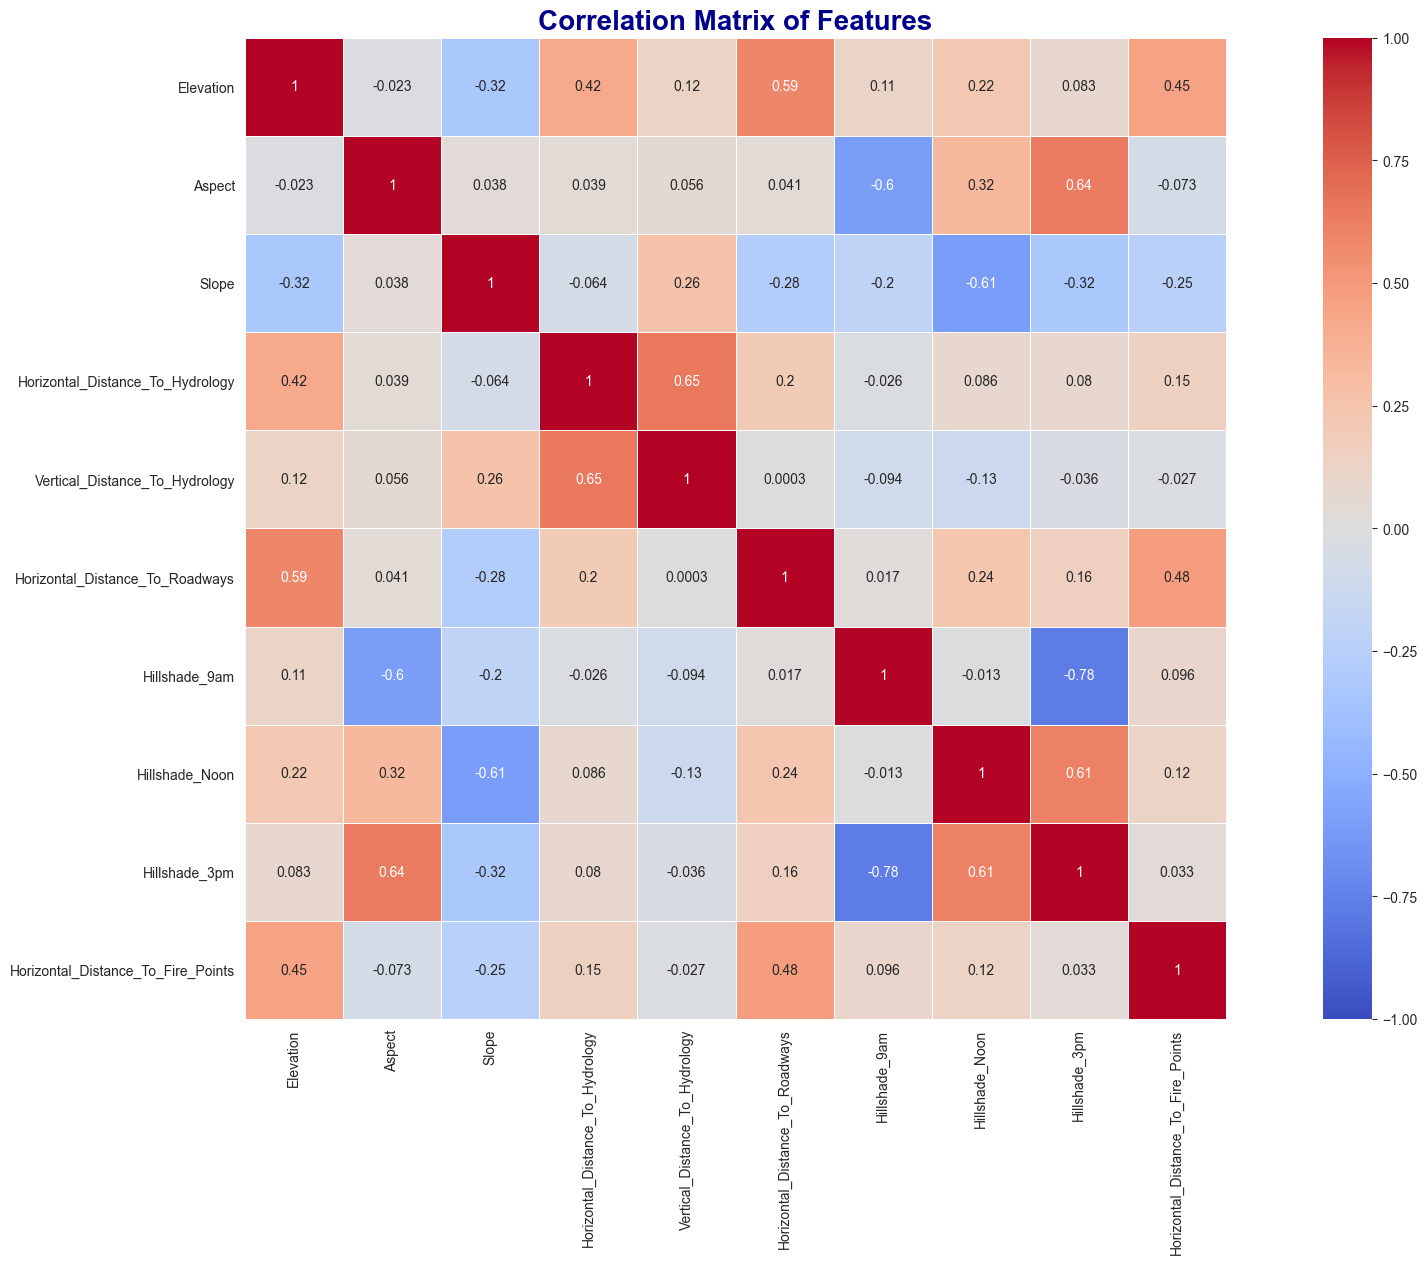

In [270]:
corr_matrix = (df[['Elevation', 'Aspect', 'Slope', 'Horizontal_Distance_To_Hydrology',
       'Vertical_Distance_To_Hydrology', 'Horizontal_Distance_To_Roadways',
       'Hillshade_9am', 'Hillshade_Noon', 'Hillshade_3pm',
       'Horizontal_Distance_To_Fire_Points', 'Cover_Type']]).corr()

font_title = {'family': 'arial',
              'color': 'darkblue',
              'weight': 'bold',
              'size': 20}

plt.figure(figsize=(25, 13))
sns.heatmap(corr_matrix, square=True, annot=True, linewidths=.5, vmin=-1, vmax=1, cmap='coolwarm')
plt.title("Correlation Matrix of Features", fontdict=font_title)
plt.show()

Hill shade at 3 pm and 9 am has the highest correlation of -0.78. The second hoghest correlation of 0.65 belongs to the pair of 
horizontal and vertical distances to hydrology. Another considerable correlation of 0.64 occurs among hill shade at 3 pm and aspect. Hill shade at noon and slope has also considerable correlation of 0.61. Similarly, hill shade at 9 am and aspect has correaltion of 0.6. Another correlation greater than 0.5 is between elavtion and horizontal distance to roadways.

## 3. Feature Engineering

### My Plan of Feature Extraction
- First, I decided to produce&transform a new column with ``Horizontal_Distance_To_Hydrology`` and ``Vertical_Distance_To_Hydrology`` columns. New column will contain the values of **Hypotenuse** of ``horizantal`` and ``vertical`` distances.

- As second, we can produce&transform an additional column which contains **average** of Horizantal Distances to Hydrology and Roadways.

- Third, I decided to transform a new column which contains **average** of `Elevation` and ``Vertical_Distance_To_Hydrology`` columns. So that, there is no need to have ``Horizontal_Distance_To_Hydrology`` and ``Vertical_Distance_To_Hydrology`` columns, because I have new columns which represent more value than them. I decide to drop these columns.

- Note that, after seeing the result of the models, there may be a possibility of making minor changes to the features in the modeling phase.

In [63]:
sq1=df_filtered['Horizontal_Distance_To_Hydrology']*df_filtered['Horizontal_Distance_To_Hydrology']
sq2=df_filtered['Vertical_Distance_To_Hydrology']*df_filtered['Vertical_Distance_To_Hydrology']
total=sq1+sq2
df_filtered['Hypotenuse']=np.sqrt(total)
df_filtered.head().T

,0,1,2,3,4
Elevation,2696.000,3269.000,3283.000,2847.000,3248.000
Aspect,123.000,110.000,322.000,89.000,93.000
Slope,10.000,19.000,18.000,31.000,12.000
Horizontal_Distance_To_Hydrology,212.000,134.000,346.000,270.000,507.000
Vertical_Distance_To_Hydrology,48.000,40.000,104.000,175.000,118.000
Horizontal_Distance_To_Roadways,2245.000,3734.000,4369.000,1320.000,570.000
Hillshade_9am,237.000,249.000,170.000,248.000,239.000
Hillshade_Noon,231.000,216.000,217.000,173.000,221.000
Hillshade_3pm,123.000,88.000,185.000,29.000,110.000
Horizontal_Distance_To_Fire_Points,2113.000,3960.000,1330.000,889.000,945.000


In [64]:
df_filtered.drop(['Horizontal_Distance_To_Hydrology','Vertical_Distance_To_Hydrology'],axis=1,inplace=True)

In [65]:
df_filtered.head().T

,0,1,2,3,4
Elevation,2696.000,3269.000,3283.000,2847.000,3248.000
Aspect,123.000,110.000,322.000,89.000,93.000
Slope,10.000,19.000,18.000,31.000,12.000
Horizontal_Distance_To_Roadways,2245.000,3734.000,4369.000,1320.000,570.000
Hillshade_9am,237.000,249.000,170.000,248.000,239.000
Hillshade_Noon,231.000,216.000,217.000,173.000,221.000
Hillshade_3pm,123.000,88.000,185.000,29.000,110.000
Horizontal_Distance_To_Fire_Points,2113.000,3960.000,1330.000,889.000,945.000
Wilderness_Area_1,0.000,1.000,1.000,0.000,0.000
Wilderness_Area_2,0.000,0.000,0.000,0.000,0.000


***
***

## 4. Prediction (Multi-class Classification)

If you have done, use your data set resulting from Feature Engineering task. If you haven't done Feature Engineering, use the latest version of your data set.
In this section, you have two main tasks that apply to each algorithm:
1. Model Building and Prediction

 - SVM (Use ``LinearSVC`` model from``sklearn.svm`` module)
 - Decision Tree (Use ``DecisionTreeClassifier`` model from ``sklearn.tree`` module)
 - Random Forest (Use ``RandomForestClassifier`` model from ``sklearn.ensemble`` module) 
 - XGBoost (Use ``XGBClassifier`` model from``xgboost`` module)

2. Visualizing the Result

- Use [yellowbrick](https://www.scikit-yb.org/en/latest/), [seaborn](https://seaborn.pydata.org/tutorial/regression.html) or [matplotlib](https://matplotlib.org/) modules to visualize the model results.

- Show three plots for the results:
 - Class Prediction Error Bar Plot
 - Confusion Matrix
 - Classification Report

### Import Libraries

In [25]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, MinMaxScaler

### Data Preprocessing

- Drop target variable
- Train-Test Split

*Note: You can use the train and test data generated here for all algorithms.*

In [66]:
X=df_filtered.drop(["Cover_Type"], axis=1)
y=df_filtered["Cover_Type"]

In [67]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, stratify=y, random_state=101)

In [68]:
scaler = MinMaxScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [69]:
from sklearn.metrics import confusion_matrix, classification_report, plot_confusion_matrix 
from sklearn.metrics import accuracy_score, recall_score, precision_score, f1_score, roc_auc_score
from sklearn.metrics import plot_roc_curve, plot_precision_recall_curve, auc, roc_curve, average_precision_score, precision_recall_curve
from sklearn.model_selection import cross_val_score, cross_validate
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import make_scorer

In [112]:
def train_val(y_train, y_train_pred, y_test, y_pred):
    
    scores = {"train_set": {"Accuracy" : accuracy_score(y_train, y_train_pred),
                            "Precision_micro" : precision_score(y_train, y_train_pred, average = "micro"),
                            "Recall_micro" : recall_score(y_train, y_train_pred, average = "micro"),                          
                            "f1_micro" : f1_score(y_train, y_train_pred, average = "micro")},
    
              "test_set": {"Accuracy" : accuracy_score(y_test, y_pred),
                           "Precision_micro" : precision_score(y_test, y_pred, average = "micro"),
                           "Recall_micro" : recall_score(y_test, y_pred, average = "micro"),                          
                           "f1_micro" : f1_score(y_test, y_pred, average = "micro")}}
    
    return pd.DataFrame(scores)

In [113]:
def model_performance(y_train, y_train_pred, y_test, y_pred):
    print(confusion_matrix(y_test, y_pred))
    print("-------------------------------------------------------")
    print(classification_report(y_test, y_pred))
    print("-------------------------------------------------------")
    print(train_val(y_train, y_train_pred, y_test, y_pred))

In [72]:
def plot_multiclass_roc(clf, X_test, y_test, n_classes, figsize=(5,5)):
    y_score = clf.predict_proba(X_test)

    # structures
    fpr = dict()
    tpr = dict()
    roc_auc = dict()

    # calculate dummies once
    y_test_dummies = pd.get_dummies(y_test, drop_first=False).values
    for i in range(n_classes):
        fpr[i], tpr[i], _ = roc_curve(y_test_dummies[:, i], y_score[:, i])
        roc_auc[i] = auc(fpr[i], tpr[i])

    # roc for each class
    fig, ax = plt.subplots(figsize=figsize)
    ax.plot([0, 1], [0, 1], 'k--')
    ax.set_xlim([0.0, 1.0])
    ax.set_ylim([0.0, 1.05])
    ax.set_xlabel('False Positive Rate')
    ax.set_ylabel('True Positive Rate')
    ax.set_title('Receiver operating characteristic example')
    for i in range(n_classes):
        ax.plot(fpr[i], tpr[i], label='ROC curve (area = %0.2f) for label %i' % (roc_auc[i], i))
    ax.legend(loc="best")
    ax.grid(alpha=.4)
    sns.despine()
    plt.show()

In [73]:
def plot_multiclass_roc_for_svm(clf, X_test, y_test, n_classes, figsize=(5,5)):
    y_score = clf.decision_function(X_test)

    # structures
    fpr = dict()
    tpr = dict()
    roc_auc = dict()

    # calculate dummies once
    y_test_dummies = pd.get_dummies(y_test, drop_first=False).values
    for i in range(n_classes):
        fpr[i], tpr[i], _ = roc_curve(y_test_dummies[:, i], y_score[:, i])
        roc_auc[i] = auc(fpr[i], tpr[i])

    # roc for each class
    fig, ax = plt.subplots(figsize=figsize)
    ax.plot([0, 1], [0, 1], 'k--')
    ax.set_xlim([0.0, 1.0])
    ax.set_ylim([0.0, 1.05])
    ax.set_xlabel('False Positive Rate')
    ax.set_ylabel('True Positive Rate')
    ax.set_title('Receiver operating characteristic example')
    for i in range(n_classes):
        ax.plot(fpr[i], tpr[i], label='ROC curve (area = %0.2f) for label %i' % (roc_auc[i], i))
    ax.legend(loc="best")
    ax.grid(alpha=.4)
    sns.despine()
    plt.show()

### Implement Support Vector Machine
- Import the modul 
- Fit the model 
- Predict the test set
- Visualize and evaluate the result (use yellowbrick module)

*Note: You probably won't get a successful result. You may need to make some changes to the model or data. This may be a topic worth investigating, you decide.*

In [146]:
from sklearn.svm import SVC, LinearSVC

In [147]:
svm_model = LinearSVC(class_weight = "balanced", random_state = 38, max_iter=10000)

In [148]:
svm_model.fit(X_train_scaled, y_train)

LinearSVC(class_weight='balanced', max_iter=10000, random_state=38)

In [149]:
y_pred_proba=svm_model.decision_function(X_test_scaled)

In [150]:
y_pred=svm_model.predict(X_test_scaled)

In [151]:
y_train_pred=svm_model.predict(X_train_scaled)

In [152]:
model_performance(y_train, y_train_pred, y_test, y_pred)

[[6809 1797   10    1  696   91 1347]
 [2761 5099  234    4 2130  437   69]
 [   0   27 5256 1465  634 3200    0]
 [   0    0  576 9164    0  510    0]
 [ 400 1523  867    0 7426  438    0]
 [   4  384 1670 1379 1459 5733    0]
 [1027    0    0    0   63    0 9554]]
-------------------------------------------------------
              precision    recall  f1-score   support

           0       0.62      0.63      0.63     10751
           1       0.58      0.48      0.52     10734
           2       0.61      0.50      0.55     10582
           3       0.76      0.89      0.82     10250
           4       0.60      0.70      0.64     10654
           5       0.55      0.54      0.55     10629
           6       0.87      0.90      0.88     10644

    accuracy                           0.66     74244
   macro avg       0.66      0.66      0.66     74244
weighted avg       0.66      0.66      0.65     74244

-------------------------------------------------------
                 train_s

In [153]:
svm_acc = accuracy_score(y_test, y_pred)
svm_f1 = f1_score(y_test, y_pred, average = "micro")
svm_f1_0 = f1_score(y_test, y_pred, labels = [0], average = "micro")
svm_f1_1 = f1_score(y_test, y_pred, labels = [1], average = "micro")
svm_f1_2 = f1_score(y_test, y_pred, labels = [2], average = "micro")
svm_f1_3 = f1_score(y_test, y_pred, labels = [3], average = "micro")
svm_f1_4 = f1_score(y_test, y_pred, labels = [4], average = "micro")
svm_f1_5 = f1_score(y_test, y_pred, labels = [5], average = "micro")
svm_f1_6 = f1_score(y_test, y_pred, labels = [6], average = "micro")

In [154]:
scoring = {"f1" : make_scorer(f1_score, average = 'micro'),
           "precision" : make_scorer(precision_score, average = 'micro'),
           "recall" : make_scorer(recall_score, average = 'micro')}

In [155]:
from sklearn.pipeline import Pipeline
operations = [("scaler", MinMaxScaler()), ("SVC", LinearSVC(class_weight = "balanced", random_state = 38, max_iter=10000))]
model = Pipeline(steps=operations)

scores = cross_validate(model, X_train, y_train, scoring = scoring, cv = 10)
df_scores = pd.DataFrame(scores, index = range(1, 11))
df_scores.mean()[2:]

test_f1          0.658
test_precision   0.658
test_recall      0.658
dtype: float64

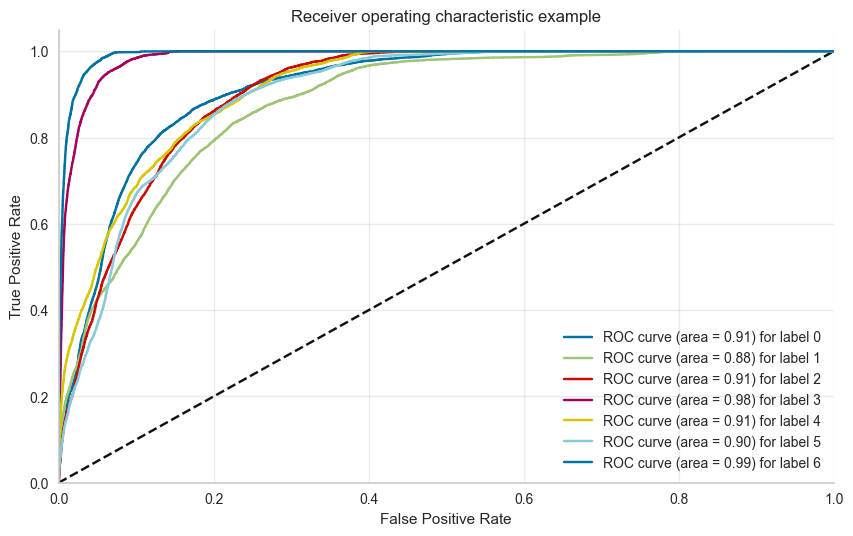

In [156]:
plot_multiclass_roc_for_svm(svm_model, X_test_scaled, y_test, n_classes=7, figsize=(10, 6))

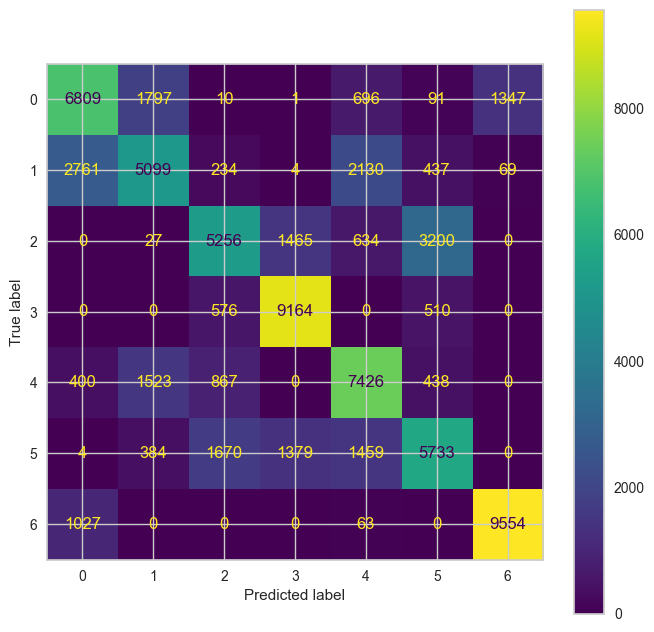

In [157]:
fig, ax = plt.subplots(figsize=(8, 8))
plot_confusion_matrix(svm_model,X_test_scaled,y_test, ax=ax)

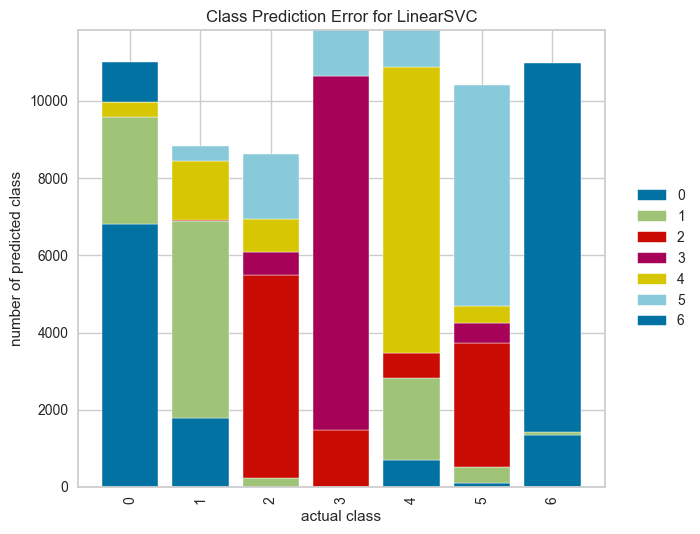

In [158]:
from yellowbrick.classifier import ClassPredictionError

visualizer = ClassPredictionError(svm_model)

# Fit the training data to the visualizer
visualizer.fit(X_train_scaled, y_train)

# Evaluate the model on the test data
visualizer.score(X_test_scaled, y_test)

# Draw visualization
visualizer.poof();

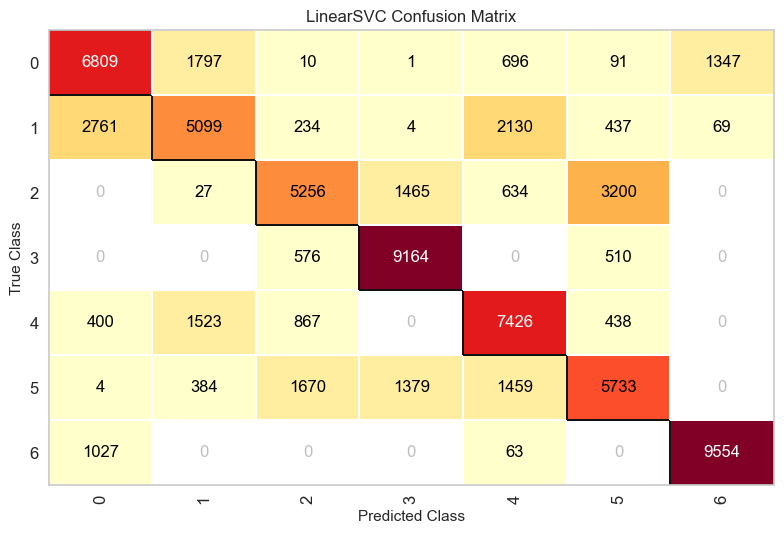

<AxesSubplot:title={'center':'LinearSVC Confusion Matrix'}, xlabel='Predicted Class', ylabel='True Class'>

In [159]:
from yellowbrick.classifier import ConfusionMatrix

cm = ConfusionMatrix(svm_model)
cm.fit(X_train_scaled, y_train)
cm.score(X_test_scaled, y_test)
cm.show()

### Implement Decision Tree Classifier
- Import the modul 
- Fit the model 
- Predict the test set
- Visualize and evaluate the result (use yellowbrick module)

In [162]:
from sklearn.tree import DecisionTreeClassifier

In [163]:
DT_model = DecisionTreeClassifier(random_state=101)

In [164]:
DT_model.fit(X_train,y_train)

DecisionTreeClassifier(random_state=101)

In [165]:
y_pred = DT_model.predict(X_test)

In [166]:
y_train_pred = DT_model.predict(X_train)

In [167]:
model_performance(y_train, y_train_pred, y_test, y_pred)

[[ 9181  1268     8     0    54    13   227]
 [ 1330  8828   147     0   269   130    30]
 [    6    87  9874   123    31   461     0]
 [    0     0    64 10135     0    51     0]
 [   24   126    16     0 10476    12     0]
 [    8    94   357    65    17 10088     0]
 [  153    20     0     0     0     0 10471]]
-------------------------------------------------------
              precision    recall  f1-score   support

           0       0.86      0.85      0.86     10751
           1       0.85      0.82      0.83     10734
           2       0.94      0.93      0.94     10582
           3       0.98      0.99      0.99     10250
           4       0.97      0.98      0.97     10654
           5       0.94      0.95      0.94     10629
           6       0.98      0.98      0.98     10644

    accuracy                           0.93     74244
   macro avg       0.93      0.93      0.93     74244
weighted avg       0.93      0.93      0.93     74244

-------------------------------

In [168]:
dt_acc = accuracy_score(y_test, y_pred)
dt_f1 = f1_score(y_test, y_pred, average = "micro")
dt_f1_0 = f1_score(y_test, y_pred, labels = [0], average = "micro")
dt_f1_1 = f1_score(y_test, y_pred, labels = [1], average = "micro")
dt_f1_2 = f1_score(y_test, y_pred, labels = [2], average = "micro")
dt_f1_3 = f1_score(y_test, y_pred, labels = [3], average = "micro")
dt_f1_4 = f1_score(y_test, y_pred, labels = [4], average = "micro")
dt_f1_5 = f1_score(y_test, y_pred, labels = [5], average = "micro")
dt_f1_6 = f1_score(y_test, y_pred, labels = [6], average = "micro")

In [169]:
from sklearn.metrics import confusion_matrix,classification_report,plot_confusion_matrix

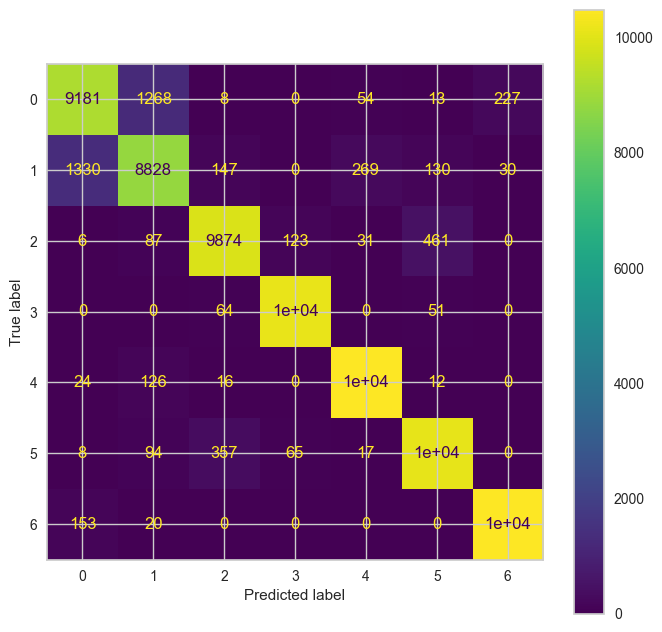

In [170]:
fig, ax = plt.subplots(figsize=(8, 8))
plot_confusion_matrix(DT_model,X_test,y_test, ax=ax)

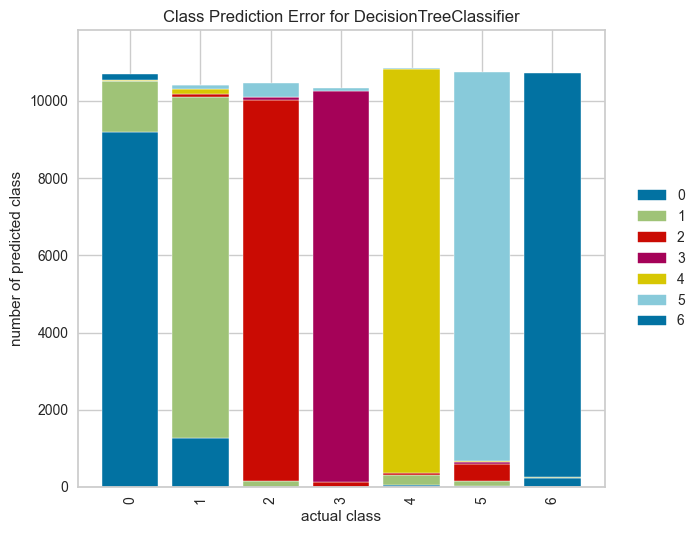

In [171]:
from yellowbrick.classifier import ClassPredictionError

visualizer = ClassPredictionError(DT_model)

# Fit the training data to the visualizer
visualizer.fit(X_train, y_train)

# Evaluate the model on the test data
visualizer.score(X_test, y_test)

# Draw visualization
visualizer.poof();

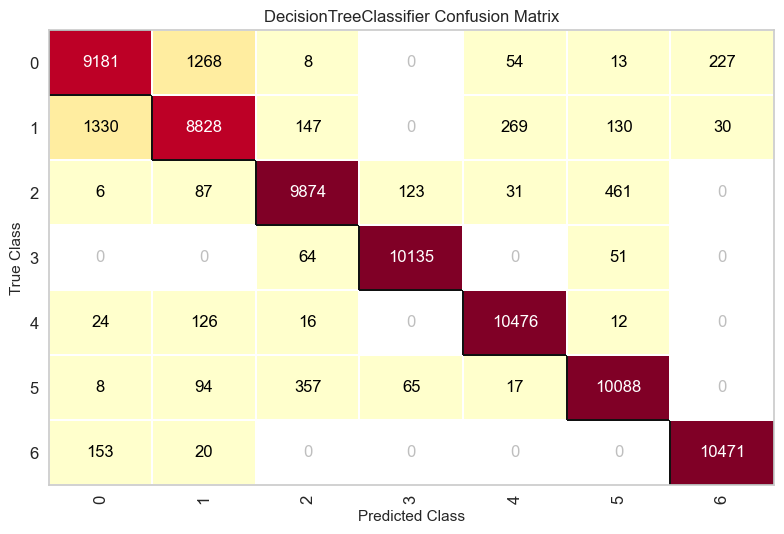

<AxesSubplot:title={'center':'DecisionTreeClassifier Confusion Matrix'}, xlabel='Predicted Class', ylabel='True Class'>

In [172]:
from yellowbrick.classifier import ConfusionMatrix

cm = ConfusionMatrix(DT_model)
cm.fit(X_train, y_train)
cm.score(X_test, y_test)
cm.show()

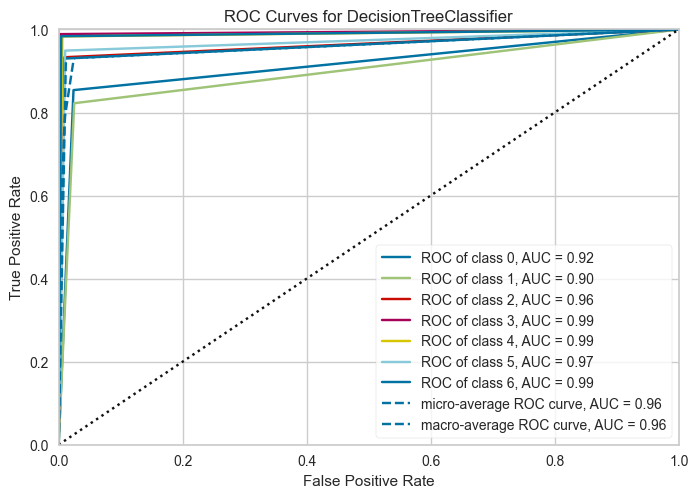

In [185]:
from yellowbrick.classifier import ROCAUC

dt_model = DecisionTreeClassifier(random_state=101)
visualizer = ROCAUC(dt_model)

visualizer.fit(X_train, y_train)        # Fit the training data to the visualizer
visualizer.score(X_test, y_test)        # Evaluate the model on the test data
visualizer.show();  

In [173]:
from sklearn.model_selection import cross_val_score, cross_validate
from sklearn.metrics import accuracy_score, f1_score, recall_score, precision_score
from sklearn.metrics import make_scorer

In [174]:
model = DecisionTreeClassifier(random_state=101)

scores = cross_validate(model, X_train, y_train, scoring = ["accuracy", "precision_micro", "recall_micro", "f1_micro"], 
                        cv = 10)
df_scores = pd.DataFrame(scores, index = range(1, 11))
df_scores

,fit_time,score_time,test_accuracy,test_precision_micro,test_recall_micro,test_f1_micro
1,2.548,0.037,0.925,0.925,0.925,0.925
2,2.556,0.035,0.923,0.923,0.923,0.923
3,2.617,0.037,0.926,0.926,0.926,0.926
4,3.139,0.036,0.922,0.922,0.922,0.922
5,3.044,0.042,0.925,0.925,0.925,0.925
6,2.672,0.035,0.931,0.931,0.931,0.931
7,2.902,0.035,0.926,0.926,0.926,0.926
8,2.553,0.034,0.924,0.924,0.924,0.924
9,2.629,0.037,0.927,0.927,0.927,0.927
10,2.703,0.035,0.928,0.928,0.928,0.928


In [175]:
df_scores.mean()[2:]

test_accuracy          0.926
test_precision_micro   0.926
test_recall_micro      0.926
test_f1_micro          0.926
dtype: float64

### Implement Random Forest Classifier
- Import the modul 
- Fit the model 
- Predict the test set
- Visualize and evaluate the result (use yellowbrick module)

In [177]:
from sklearn.ensemble import RandomForestClassifier

In [178]:
rf_model = RandomForestClassifier(class_weight="balanced", random_state=38)
rf_model.fit(X_train, y_train)
y_pred_proba=rf_model.predict_proba(X_test)
y_pred=rf_model.predict(X_test)
y_train_pred=rf_model.predict(X_train)
model_performance(y_train, y_train_pred, y_test, y_pred)

[[ 9622   895     5     0    49     9   171]
 [  817  9433   111     0   218   131    24]
 [    0    12 10130   101    13   326     0]
 [    0     0     6 10236     0     8     0]
 [    0    16    12     0 10622     4     0]
 [    0     9   150    52     3 10415     0]
 [   42     1     0     0     0     0 10601]]
-------------------------------------------------------
              precision    recall  f1-score   support

           0       0.92      0.89      0.91     10751
           1       0.91      0.88      0.89     10734
           2       0.97      0.96      0.96     10582
           3       0.99      1.00      0.99     10250
           4       0.97      1.00      0.99     10654
           5       0.96      0.98      0.97     10629
           6       0.98      1.00      0.99     10644

    accuracy                           0.96     74244
   macro avg       0.96      0.96      0.96     74244
weighted avg       0.96      0.96      0.96     74244

-------------------------------

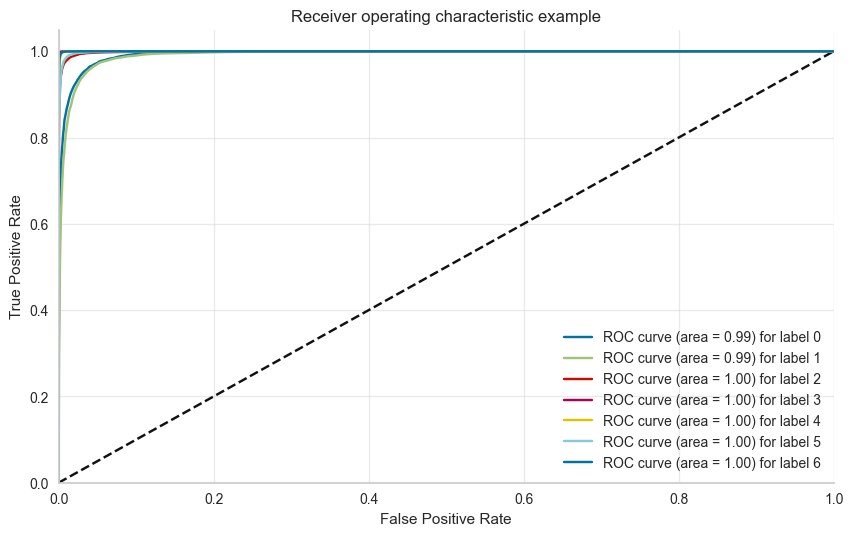

In [179]:
plot_multiclass_roc(rf_model, X_test, y_test, n_classes=7, figsize=(10, 6))

In [180]:
model = RandomForestClassifier(class_weight="balanced", random_state=38)
scores = cross_validate(model, X_train, y_train, scoring = ["accuracy", "precision_micro", "recall_micro", "f1_micro"], cv = 10)
df_scores = pd.DataFrame(scores, index = range(1, 11))
df_scores.mean()[2:]

test_accuracy          0.954
test_precision_micro   0.954
test_recall_micro      0.954
test_f1_micro          0.954
dtype: float64

In [181]:
rf_acc = accuracy_score(y_test, y_pred)
rf_f1 = f1_score(y_test, y_pred, average = "micro")
rf_f1_0 = f1_score(y_test, y_pred, labels = [0], average = "micro")
rf_f1_1 = f1_score(y_test, y_pred, labels = [1], average = "micro")
rf_f1_2 = f1_score(y_test, y_pred, labels = [2], average = "micro")
rf_f1_3 = f1_score(y_test, y_pred, labels = [3], average = "micro")
rf_f1_4 = f1_score(y_test, y_pred, labels = [4], average = "micro")
rf_f1_5 = f1_score(y_test, y_pred, labels = [5], average = "micro")
rf_f1_6 = f1_score(y_test, y_pred, labels = [6], average = "micro")

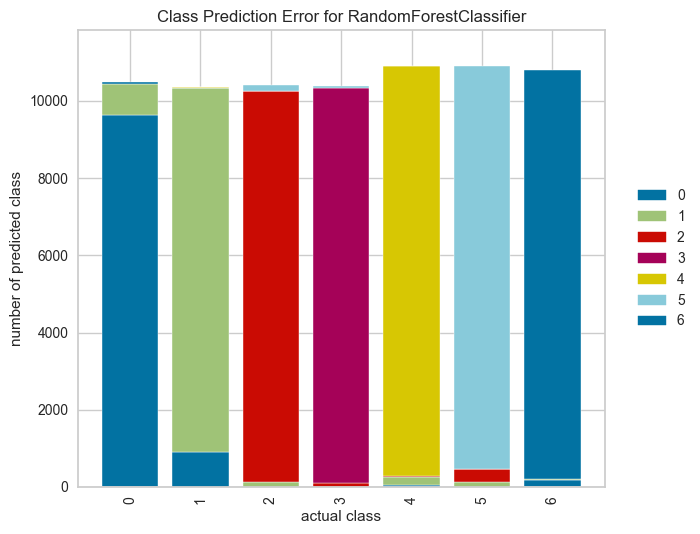

<AxesSubplot:title={'center':'Class Prediction Error for RandomForestClassifier'}, xlabel='actual class', ylabel='number of predicted class'>

In [182]:
from yellowbrick.classifier import ClassPredictionError

visualizer = ClassPredictionError(rf_model)
visualizer.fit(X_train, y_train)
visualizer.score(X_test, y_test)
visualizer.show()

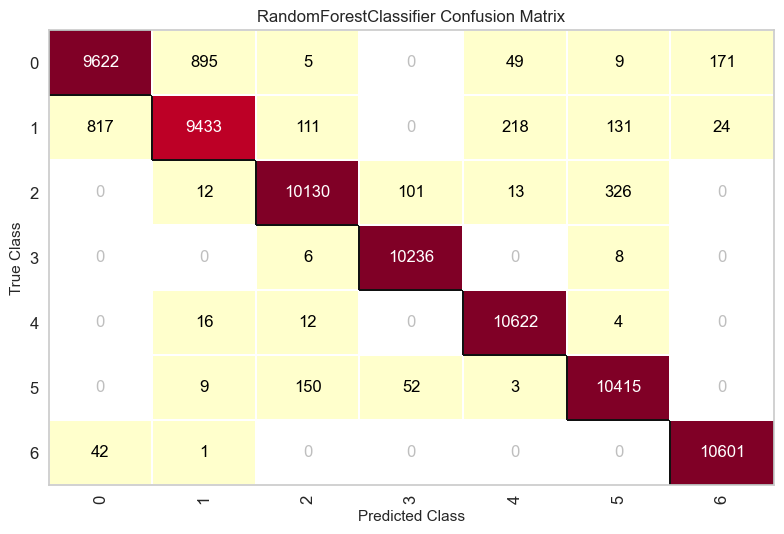

<AxesSubplot:title={'center':'RandomForestClassifier Confusion Matrix'}, xlabel='Predicted Class', ylabel='True Class'>

In [183]:
from yellowbrick.classifier import ConfusionMatrix

cm = ConfusionMatrix(rf_model)
cm.fit(X_train, y_train)
cm.score(X_test, y_test)
cm.show()

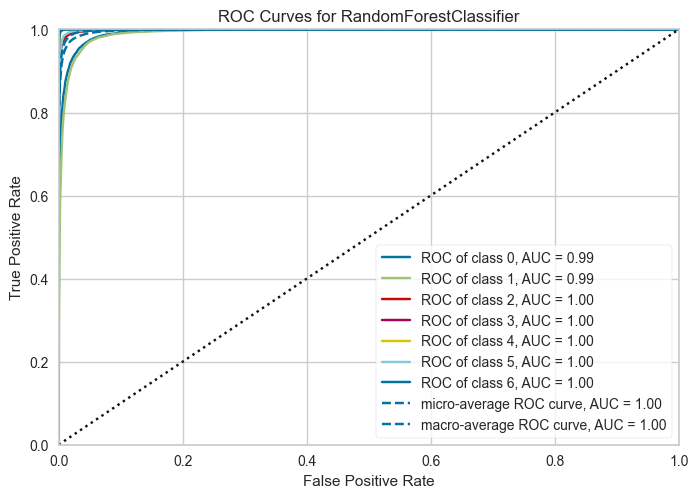

In [184]:
from yellowbrick.classifier import ROCAUC

rf_model = RandomForestClassifier(random_state=101)
visualizer = ROCAUC(rf_model)

visualizer.fit(X_train, y_train)        # Fit the training data to the visualizer
visualizer.score(X_test, y_test)        # Evaluate the model on the test data
visualizer.show();                       # Finalize and render the figure

### Implement XGBoost Classifer
- Import the modul 
- Fit the model 
- Predict the test set
- Visualize and evaluate the result (use yellowbrick module)

In [186]:
from xgboost import XGBClassifier

In [187]:
xgb_model = XGBClassifier(random_state=38)
xgb_model.fit(X_train, y_train)
y_pred_proba=xgb_model.predict_proba(X_test)
y_pred=xgb_model.predict(X_test)
y_train_pred=xgb_model.predict(X_train)
model_performance(y_train, y_train_pred, y_test, y_pred)

[[ 7366  1366     5     0   579    52  1383]
 [ 2436  5182   181     3  2321   450   161]
 [    0     0  6827   854   306  2595     0]
 [    0     0   333  9814     0   103     0]
 [   21   219   306     0  9771   337     0]
 [    0     2  2187   388   283  7769     0]
 [  560     0     0     0     0     0 10084]]
-------------------------------------------------------
              precision    recall  f1-score   support

           0       0.71      0.69      0.70     10751
           1       0.77      0.48      0.59     10734
           2       0.69      0.65      0.67     10582
           3       0.89      0.96      0.92     10250
           4       0.74      0.92      0.82     10654
           5       0.69      0.73      0.71     10629
           6       0.87      0.95      0.91     10644

    accuracy                           0.77     74244
   macro avg       0.76      0.77      0.76     74244
weighted avg       0.76      0.77      0.76     74244

-------------------------------

In [188]:
scoring = {"f1" : make_scorer(f1_score, average='micro'),
           "precision" : make_scorer(precision_score, average='micro'),
           "recall" : make_scorer(recall_score, average='micro')}

In [195]:
model = XGBClassifier(random_state=38)

scores = cross_validate(model, X_train, y_train, scoring = scoring, cv = 5)
df_scores = pd.DataFrame(scores, index = range(1, 6))
df_scores.mean()[2:]

test_f1          0.764
test_precision   0.764
test_recall      0.764
dtype: float64

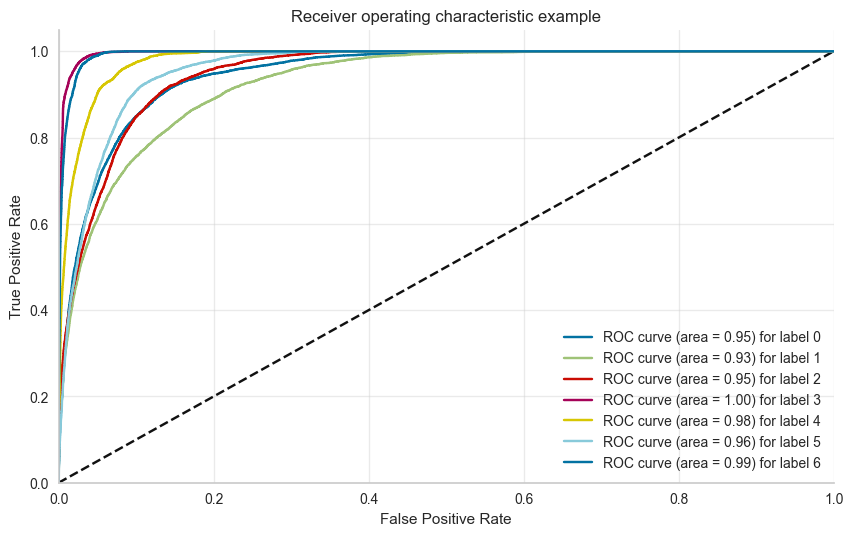

In [189]:
plot_multiclass_roc(xgb_model, X_test, y_test, n_classes=7, figsize=(10, 6))

In [190]:
xgb_acc = accuracy_score(y_test, y_pred)
xgb_f1 = f1_score(y_test, y_pred, average = "micro")
xgb_f1_0 = f1_score(y_test, y_pred, labels = [0], average = "micro")
xgb_f1_1 = f1_score(y_test, y_pred, labels = [1], average = "micro")
xgb_f1_2 = f1_score(y_test, y_pred, labels = [2], average = "micro")
xgb_f1_3 = f1_score(y_test, y_pred, labels = [3], average = "micro")
xgb_f1_4 = f1_score(y_test, y_pred, labels = [4], average = "micro")
xgb_f1_5 = f1_score(y_test, y_pred, labels = [5], average = "micro")
xgb_f1_6 = f1_score(y_test, y_pred, labels = [6], average = "micro")

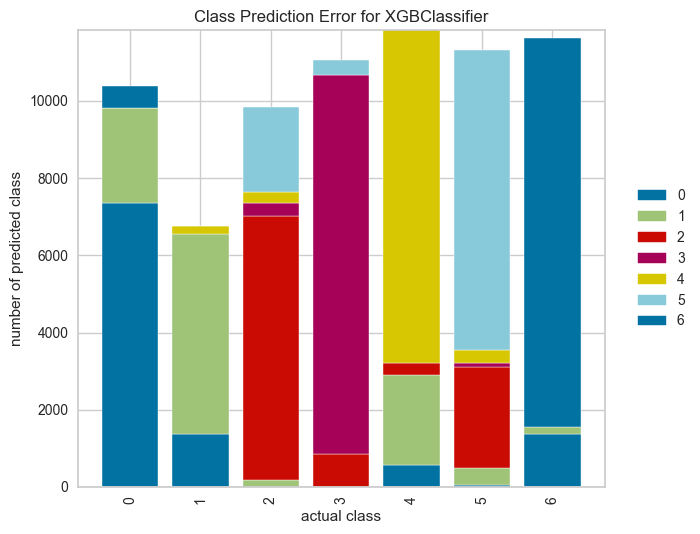

<AxesSubplot:title={'center':'Class Prediction Error for XGBClassifier'}, xlabel='actual class', ylabel='number of predicted class'>

In [191]:
from yellowbrick.classifier import ClassPredictionError

visualizer = ClassPredictionError(xgb_model)
visualizer.fit(X_train, y_train)
visualizer.score(X_test, y_test)
visualizer.show()

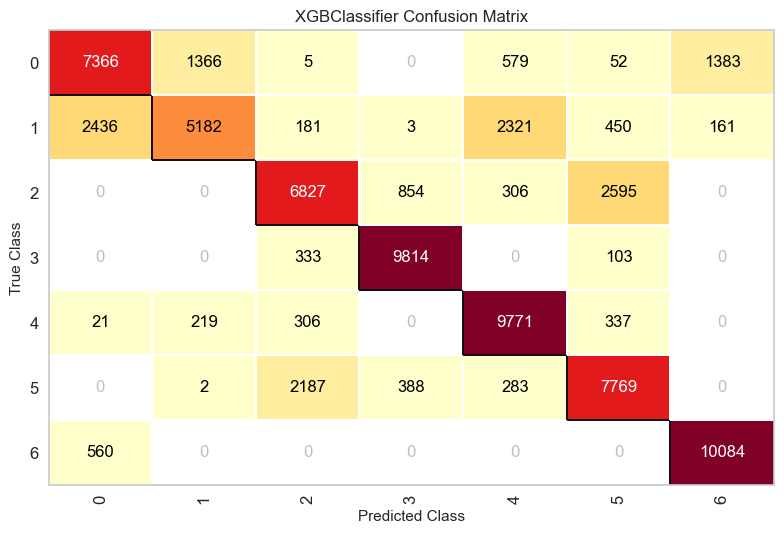

<AxesSubplot:title={'center':'XGBClassifier Confusion Matrix'}, xlabel='Predicted Class', ylabel='True Class'>

In [192]:
from yellowbrick.classifier import ConfusionMatrix

cm = ConfusionMatrix(xgb_model)
cm.fit(X_train, y_train)
cm.score(X_test, y_test)
cm.show()

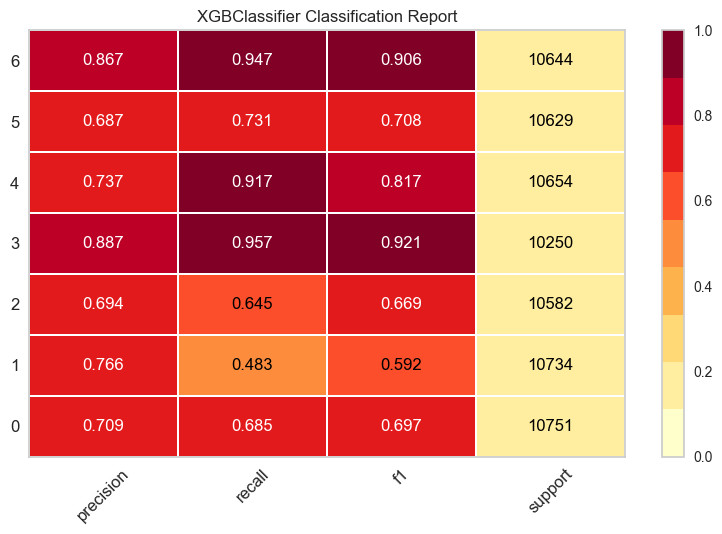

<AxesSubplot:title={'center':'XGBClassifier Classification Report'}>

In [193]:
from yellowbrick.classifier import ClassificationReport

visualizer = ClassificationReport(xgb_model, support=True)
visualizer.fit(X_train, y_train)        
visualizer.score(X_test, y_test)        
visualizer.show()

### Compare The Models

So far, you have created a multi-classifier model with 4 different algorithms and made predictions. You can observe the performance of the models together with a barplot of your choice.

- Which algorithm did you achieve the highest prediction performance with? 
- What could be the factors that cause this? What are the principles of the most successful algorithm and its differences from other algorithms? 

In contrast;

- Which algorithm did you achieve the lowest prediction performance with? 
- What could be the factors that cause this? What are the principles of the most successful algorithm and its differences from other algorithms? 

The answers you will look for to these questions will increase your gains from Machine Learning course.

# Accuracy and  F1 Score Comparison

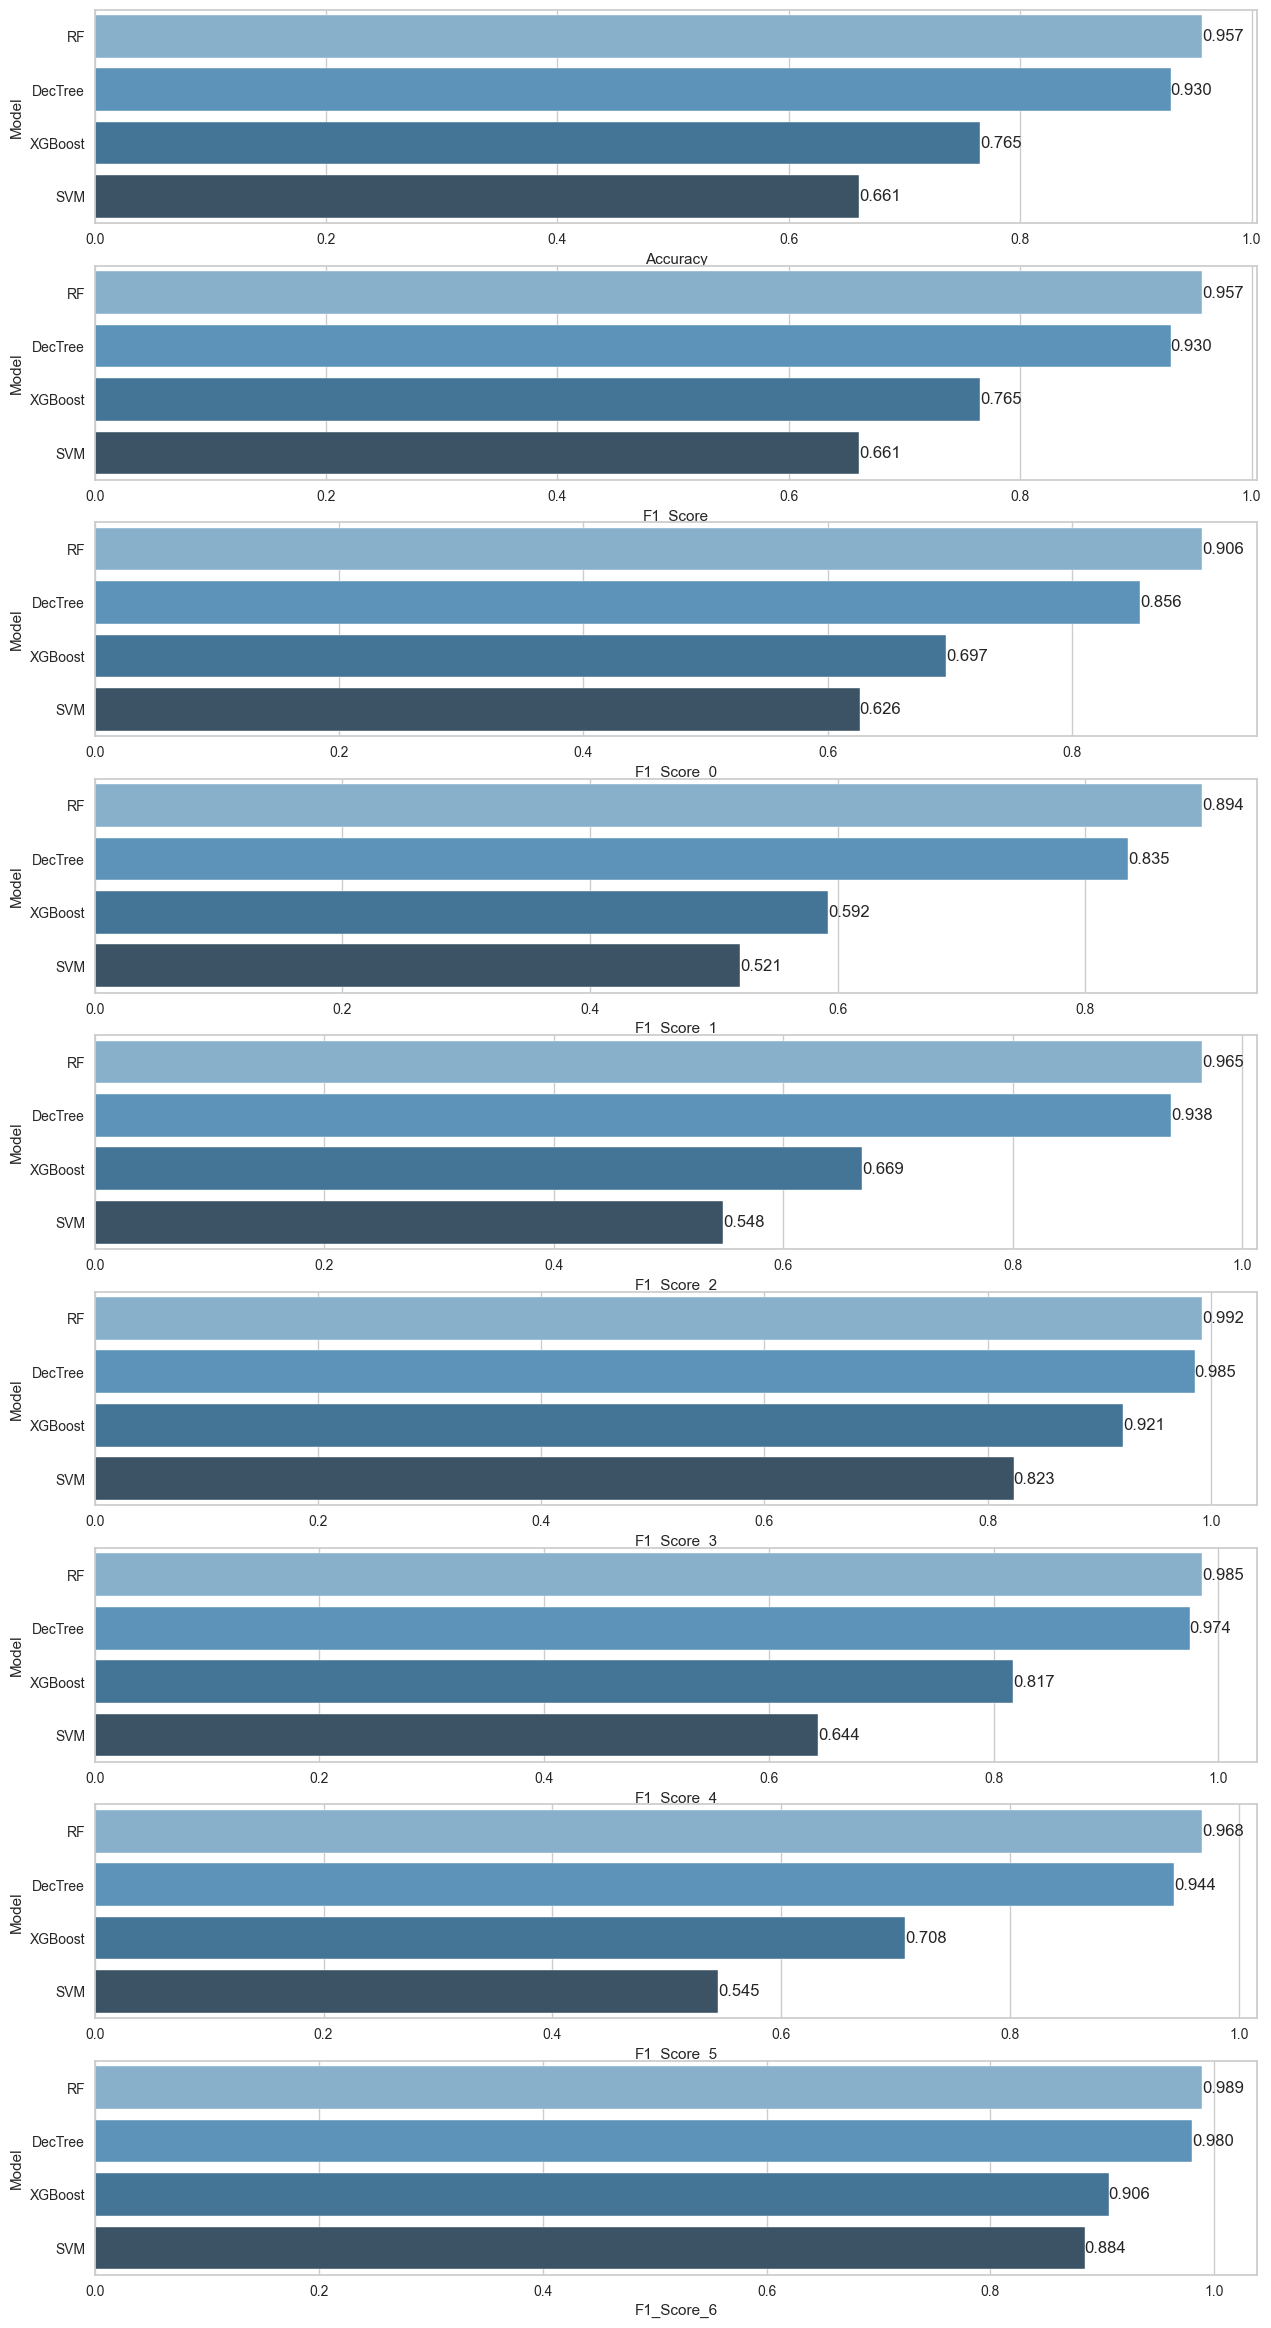

In [194]:
compare = pd.DataFrame({"Model": ["DecTree", "SVM", "RF", "XGBoost"],
                        "Accuracy": [dt_acc, svm_acc, rf_acc, xgb_acc],
                        "F1_Score": [dt_f1, svm_f1, rf_f1, xgb_f1],
                        "F1_Score_0": [dt_f1_0, svm_f1_0, rf_f1_0, xgb_f1_0],
                        "F1_Score_1": [dt_f1_1, svm_f1_1, rf_f1_1, xgb_f1_1],
                        "F1_Score_2": [dt_f1_2, svm_f1_2, rf_f1_2, xgb_f1_2],
                        "F1_Score_3": [dt_f1_3, svm_f1_3, rf_f1_3, xgb_f1_3],
                        "F1_Score_4": [dt_f1_4, svm_f1_4, rf_f1_4, xgb_f1_4],
                        "F1_Score_5": [dt_f1_5, svm_f1_5, rf_f1_5, xgb_f1_5],
                        "F1_Score_6": [dt_f1_6, svm_f1_6, rf_f1_6, xgb_f1_6],
                        })

def labels(ax):
    for p in ax.patches:
        width = p.get_width()                        # get bar length
        ax.text(width,                               # set the text at 1 unit right of the bar
                p.get_y() + p.get_height() / 2,      # get Y coordinate + X coordinate / 2
                '{:1.3f}'.format(width),             # set variable to display, 2 decimals
                ha = 'left',                         # horizontal alignment
                va = 'center')                       # vertical alignment
    
plt.figure(figsize=(15,30))
plt.subplot(911)
compare = compare.sort_values(by="Accuracy", ascending=False)
ax=sns.barplot(x="Accuracy", y="Model", data=compare, palette="Blues_d")
labels(ax)

plt.subplot(912)
compare = compare.sort_values(by="F1_Score", ascending=False)
ax=sns.barplot(x="F1_Score", y="Model", data=compare, palette="Blues_d")
labels(ax)

plt.subplot(913)
compare = compare.sort_values(by="F1_Score_0", ascending=False)
ax=sns.barplot(x="F1_Score_0", y="Model", data=compare, palette="Blues_d")
labels(ax)

plt.subplot(914)
compare = compare.sort_values(by="F1_Score_1", ascending=False)
ax=sns.barplot(x="F1_Score_1", y="Model", data=compare, palette="Blues_d")
labels(ax)

plt.subplot(915)
compare = compare.sort_values(by="F1_Score_2", ascending=False)
ax=sns.barplot(x="F1_Score_2", y="Model", data=compare, palette="Blues_d")
labels(ax)

plt.subplot(916)
compare = compare.sort_values(by="F1_Score_3", ascending=False)
ax=sns.barplot(x="F1_Score_3", y="Model", data=compare, palette="Blues_d")
labels(ax)

plt.subplot(917)
compare = compare.sort_values(by="F1_Score_4", ascending=False)
ax=sns.barplot(x="F1_Score_4", y="Model", data=compare, palette="Blues_d")
labels(ax)

plt.subplot(918)
compare = compare.sort_values(by="F1_Score_5", ascending=False)
ax=sns.barplot(x="F1_Score_5", y="Model", data=compare, palette="Blues_d")
labels(ax)

plt.subplot(919)
compare = compare.sort_values(by="F1_Score_6", ascending=False)
ax=sns.barplot(x="F1_Score_6", y="Model", data=compare, palette="Blues_d")
labels(ax)
plt.show()

__Summary:__ Random Forest Calssifier is better than other three models both for general scores and all class label scores.

___

<p style="text-align: center;"><img src="https://docs.google.com/uc?id=1lY0Uj5R04yMY3-ZppPWxqCr5pvBLYPnV" class="img-fluid" alt="CLRSWY"></p>

___